In [52]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 40
import matplotlib.pyplot as plt
import sys
sys.path.append('/storage1/francesco/scripts/')
import bme_reweight as bme
from sklearn.linear_model import LinearRegression
import scipy.optimize as optimize

In [107]:
#Loading experimental SAXS profile and Pepsi ensemble
inp_exp = np.loadtxt('exp_saxs.txt') 
exp = inp_exp[...,1]
err = inp_exp[...,2]
calc = np.loadtxt('calc_saxs.txt', usecols = range(1,1044))

#theta value for BME fixed to 80 fo all the following trials
t = 80

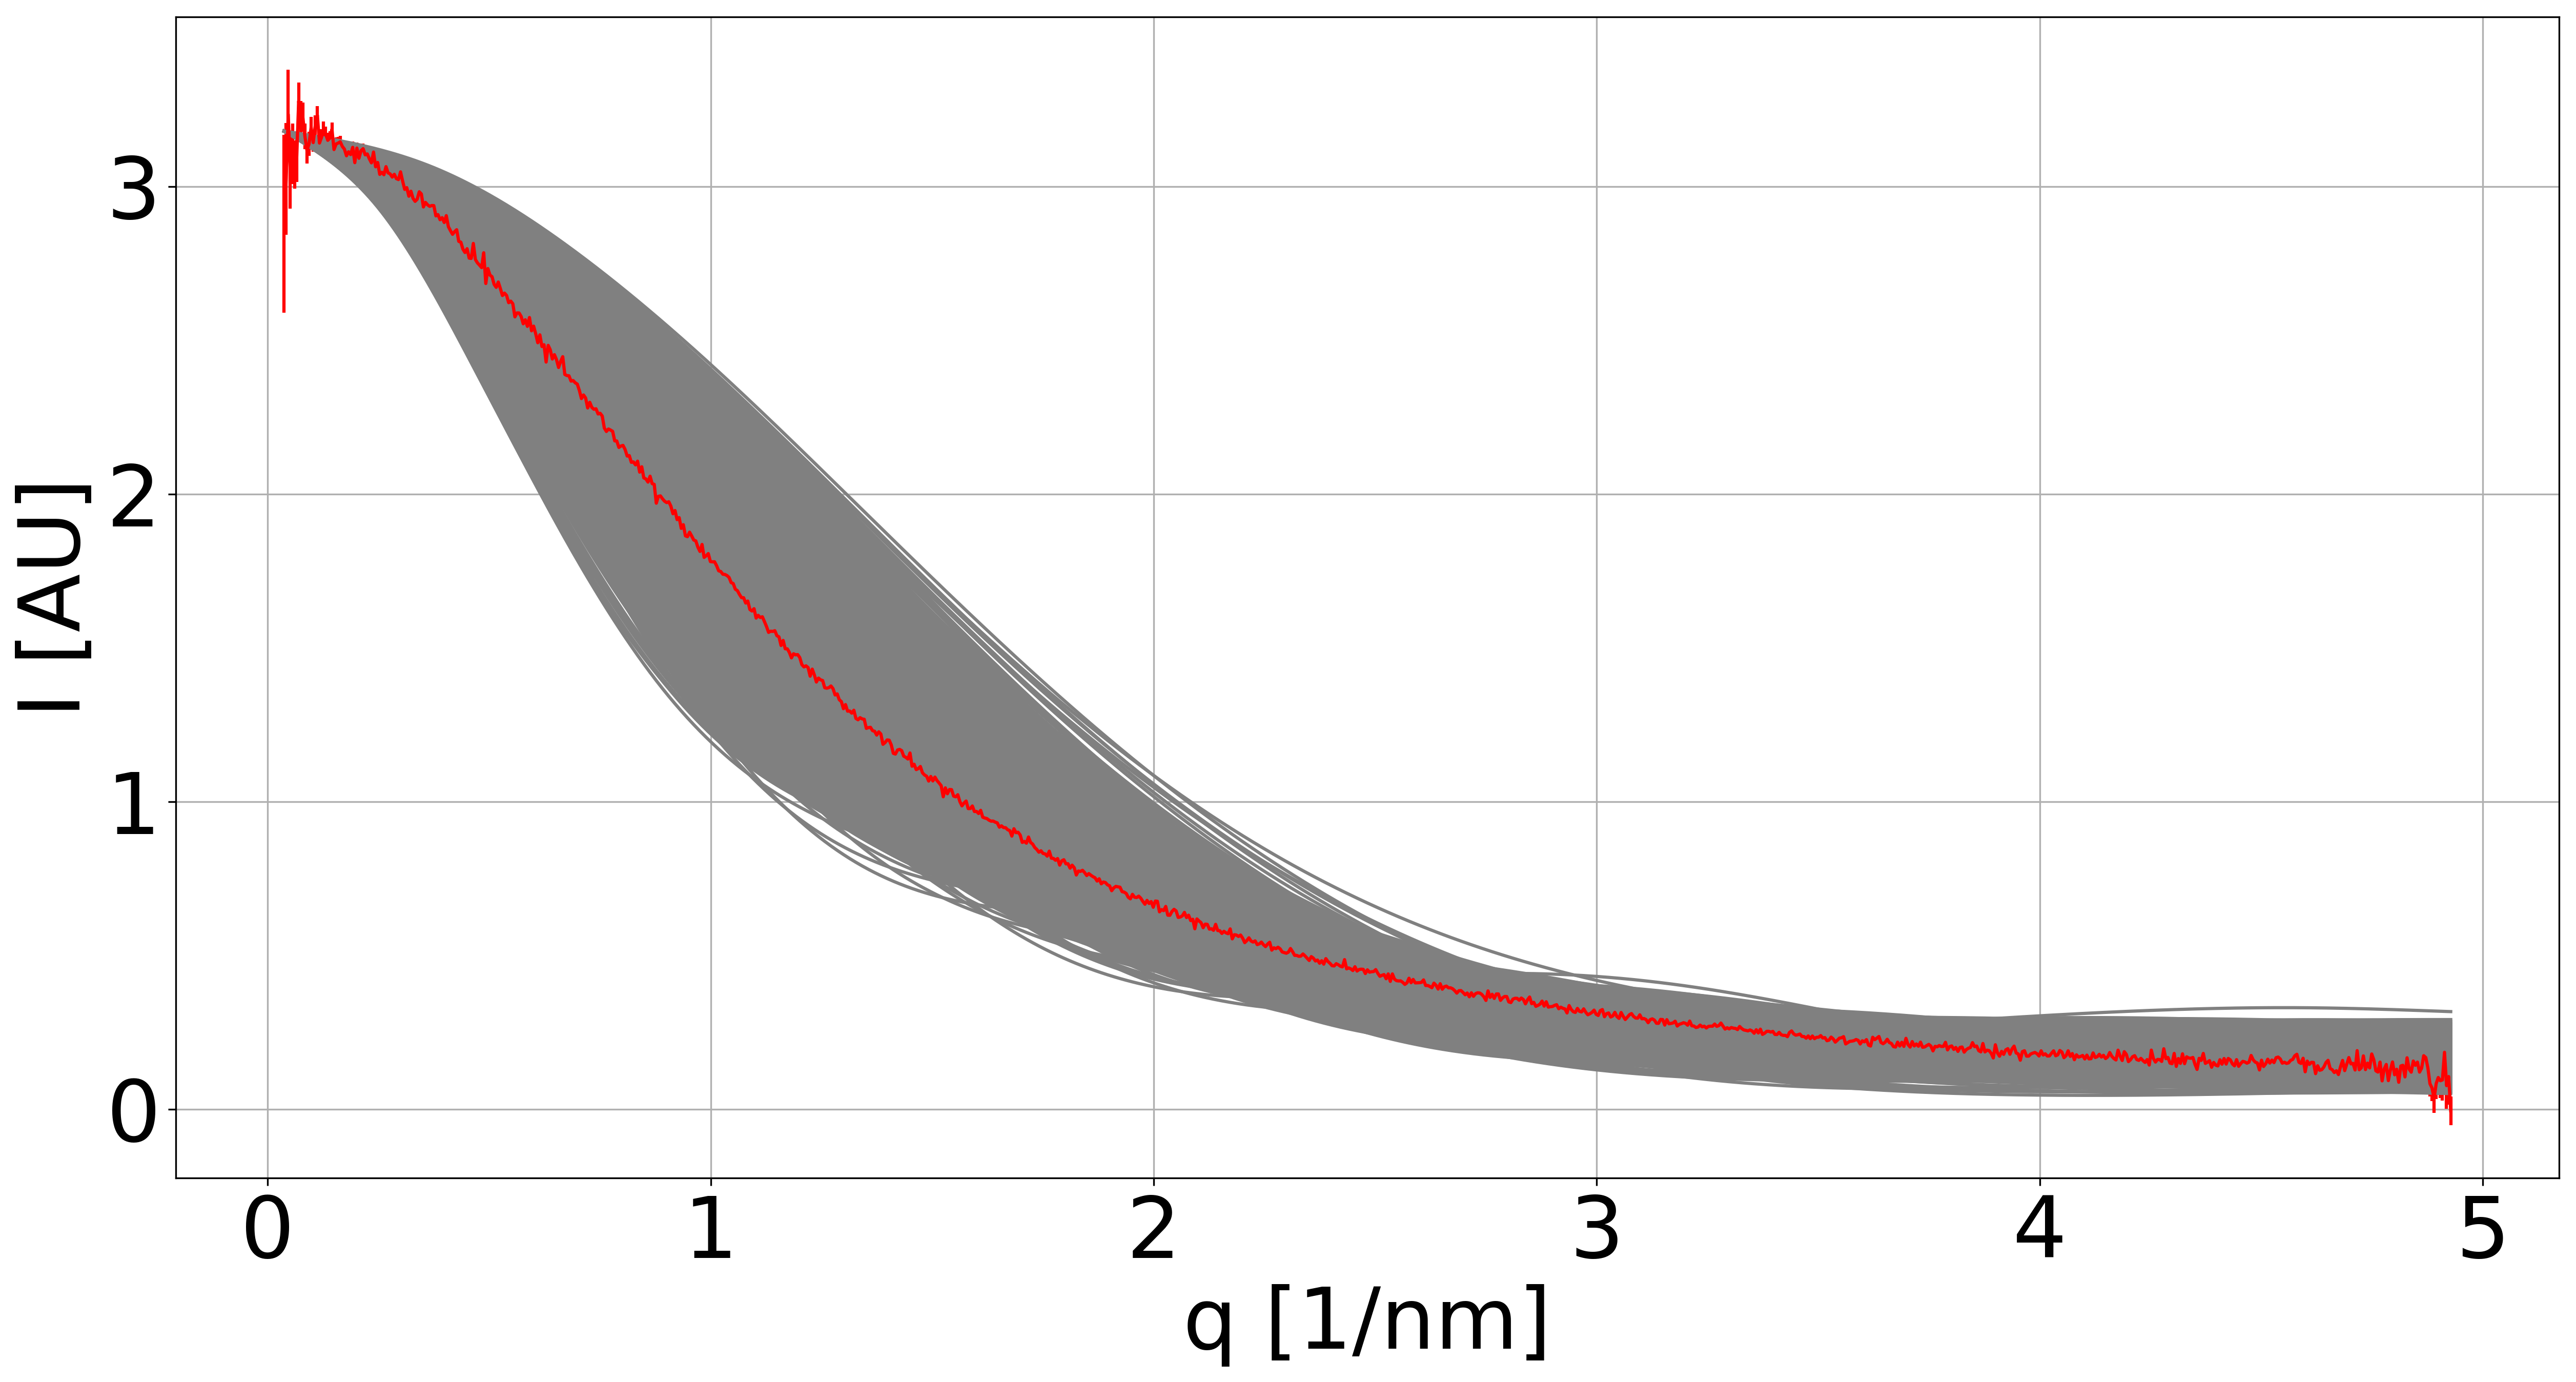

In [139]:
#Plotting the initial Pepsi-SAXS dataset in comparison to the experimental dataset
plt.fig = plt.figure(figsize=(20, 10), dpi=300)
plt.yscale = 'log'
for i in range(0,np.shape(calc)[0]):
    plt.errorbar(inp_exp[...,0],calc[i],fmt='grey',linewidth=1.5)
plt.errorbar(inp_exp[...,0],exp,err,fmt='red',linewidth=1.5)
plt.xlabel('q [1/nm]')
plt.ylabel('I [AU]')
plt.grid(True)
plt.show()

## TRIAL 1
### Weighted linear regression (with w=1/exp_err), without fixed point-iteration method.

In [121]:
#Initialize cycle counter (c), empy list to store at each cycle the results of BME (data) and a list for storing scale factor/offset (ab) initialized with initial scale factor = 1 and initial offset = 0
c = 0
data = []
ab = [np.array([0,1,0])]

#First averaging of Pepsi-SAXS profiles with uniform weights
Iav = np.mean(calc,axis=0)
err = inp_exp[...,2] #Getting errors of the experimental SAXS profile from input
wlr = 1/err #Calculating weights

In [ ]:
while c < 50: #Doing 50 cycles
    
    #Using LinearRegression module from scikit learn library to perform linear regression and obtain scale factor/offset
    model = LinearRegression()
    model.fit(Iav.reshape(-1,1),exp,wlr) #Here weights are introduced in doing linear regression
    alpha = model.coef_[0] #Scale factor
    beta = model.intercept_ #Offset
    ab.append(np.array([c,alpha,beta]))

    #Applying scale factor and offset obtained in this cycle to the Pepsi-SAXS ensemble and write to file to feed BME
    new_calc_raw = alpha*calc+beta
    new_calc = open('tmp', 'w')
    new_calc.write('#\n')
    for i in range(0,np.shape(new_calc_raw)[0]):
        new_calc.write('frame'+str(i)+' '+' '.join(str(n) for n in new_calc_raw[i])+'\n')
    new_calc.close()

    #Running BME with the scaled/shifted ensemble
    rew = bme.Reweight()
    rew.load('exp_saxs.txt', 'tmp')
    chi2_before, chi2_after, srel = rew.optimize(theta=t)
    data.append(np.array([c, chi2_before, chi2_after, np.exp(srel)]))
    weights = rew.get_weights()

    #Weighted average of the Pepsi-SAXS profiles with BME weights
    calc_rew = []
    for i in range(0,np.shape(new_calc_raw)[1]):
        calc_rew.append((new_calc_raw[...,i]*weights).sum())
    Iav = np.array(calc_rew)

    c += 1

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1502e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1462e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1481e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1381e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1340e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1299e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1258e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1427e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1416e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1855e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1814e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1834e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1732e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1691e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1650e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1608e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1779e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1768e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1844e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1803e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1822e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1720e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1679e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1638e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1596e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1767e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1756e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1843e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1802e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1822e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1720e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1679e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1638e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1596e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1767e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1756e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1843e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1802e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1822e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1720e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1679e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1638e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1596e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1767e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1756e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1843e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1802e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1822e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1720e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1679e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1638e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1596e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1767e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1756e+00
# Wa

# Warning: expt average         3.725569e-02=2.8791e+00 is smaller than minimum value in simulation 3.1843e+00
# Warning: expt average         4.194901e-02=3.0249e+00 is smaller than minimum value in simulation 3.1802e+00
# Warning: expt average         4.664234e-02=3.2342e+00 is larger than maximum value in simulation 3.1822e+00
# Warning: expt average         5.133567e-02=3.0467e+00 is smaller than minimum value in simulation 3.1720e+00
# Warning: expt average         5.602899e-02=3.1067e+00 is smaller than minimum value in simulation 3.1679e+00
# Warning: expt average         6.072232e-02=3.0713e+00 is smaller than minimum value in simulation 3.1638e+00
# Warning: expt average         6.541565e-02=3.0853e+00 is smaller than minimum value in simulation 3.1596e+00
# Warning: expt average         7.010897e-02=3.2774e+00 is larger than maximum value in simulation 3.1767e+00
# Warning: expt average         7.480230e-02=3.2208e+00 is larger than maximum value in simulation 3.1756e+00
# Wa

In [ ]:
#Saving results to file
np.savetxt('data_trial3', data, fmt='%10.5f', delimiter=' ', newline='\n')
np.savetxt('ab_trial3', ab, fmt='%10.5f', delimiter=' ', newline='\n')

In [140]:
#Reloading the results for analysis
d = np.loadtxt('data_trial3')
a_b = np.loadtxt('ab_trial3')
print(d[-1])

[49.       5.33472  1.12597  0.7056 ]


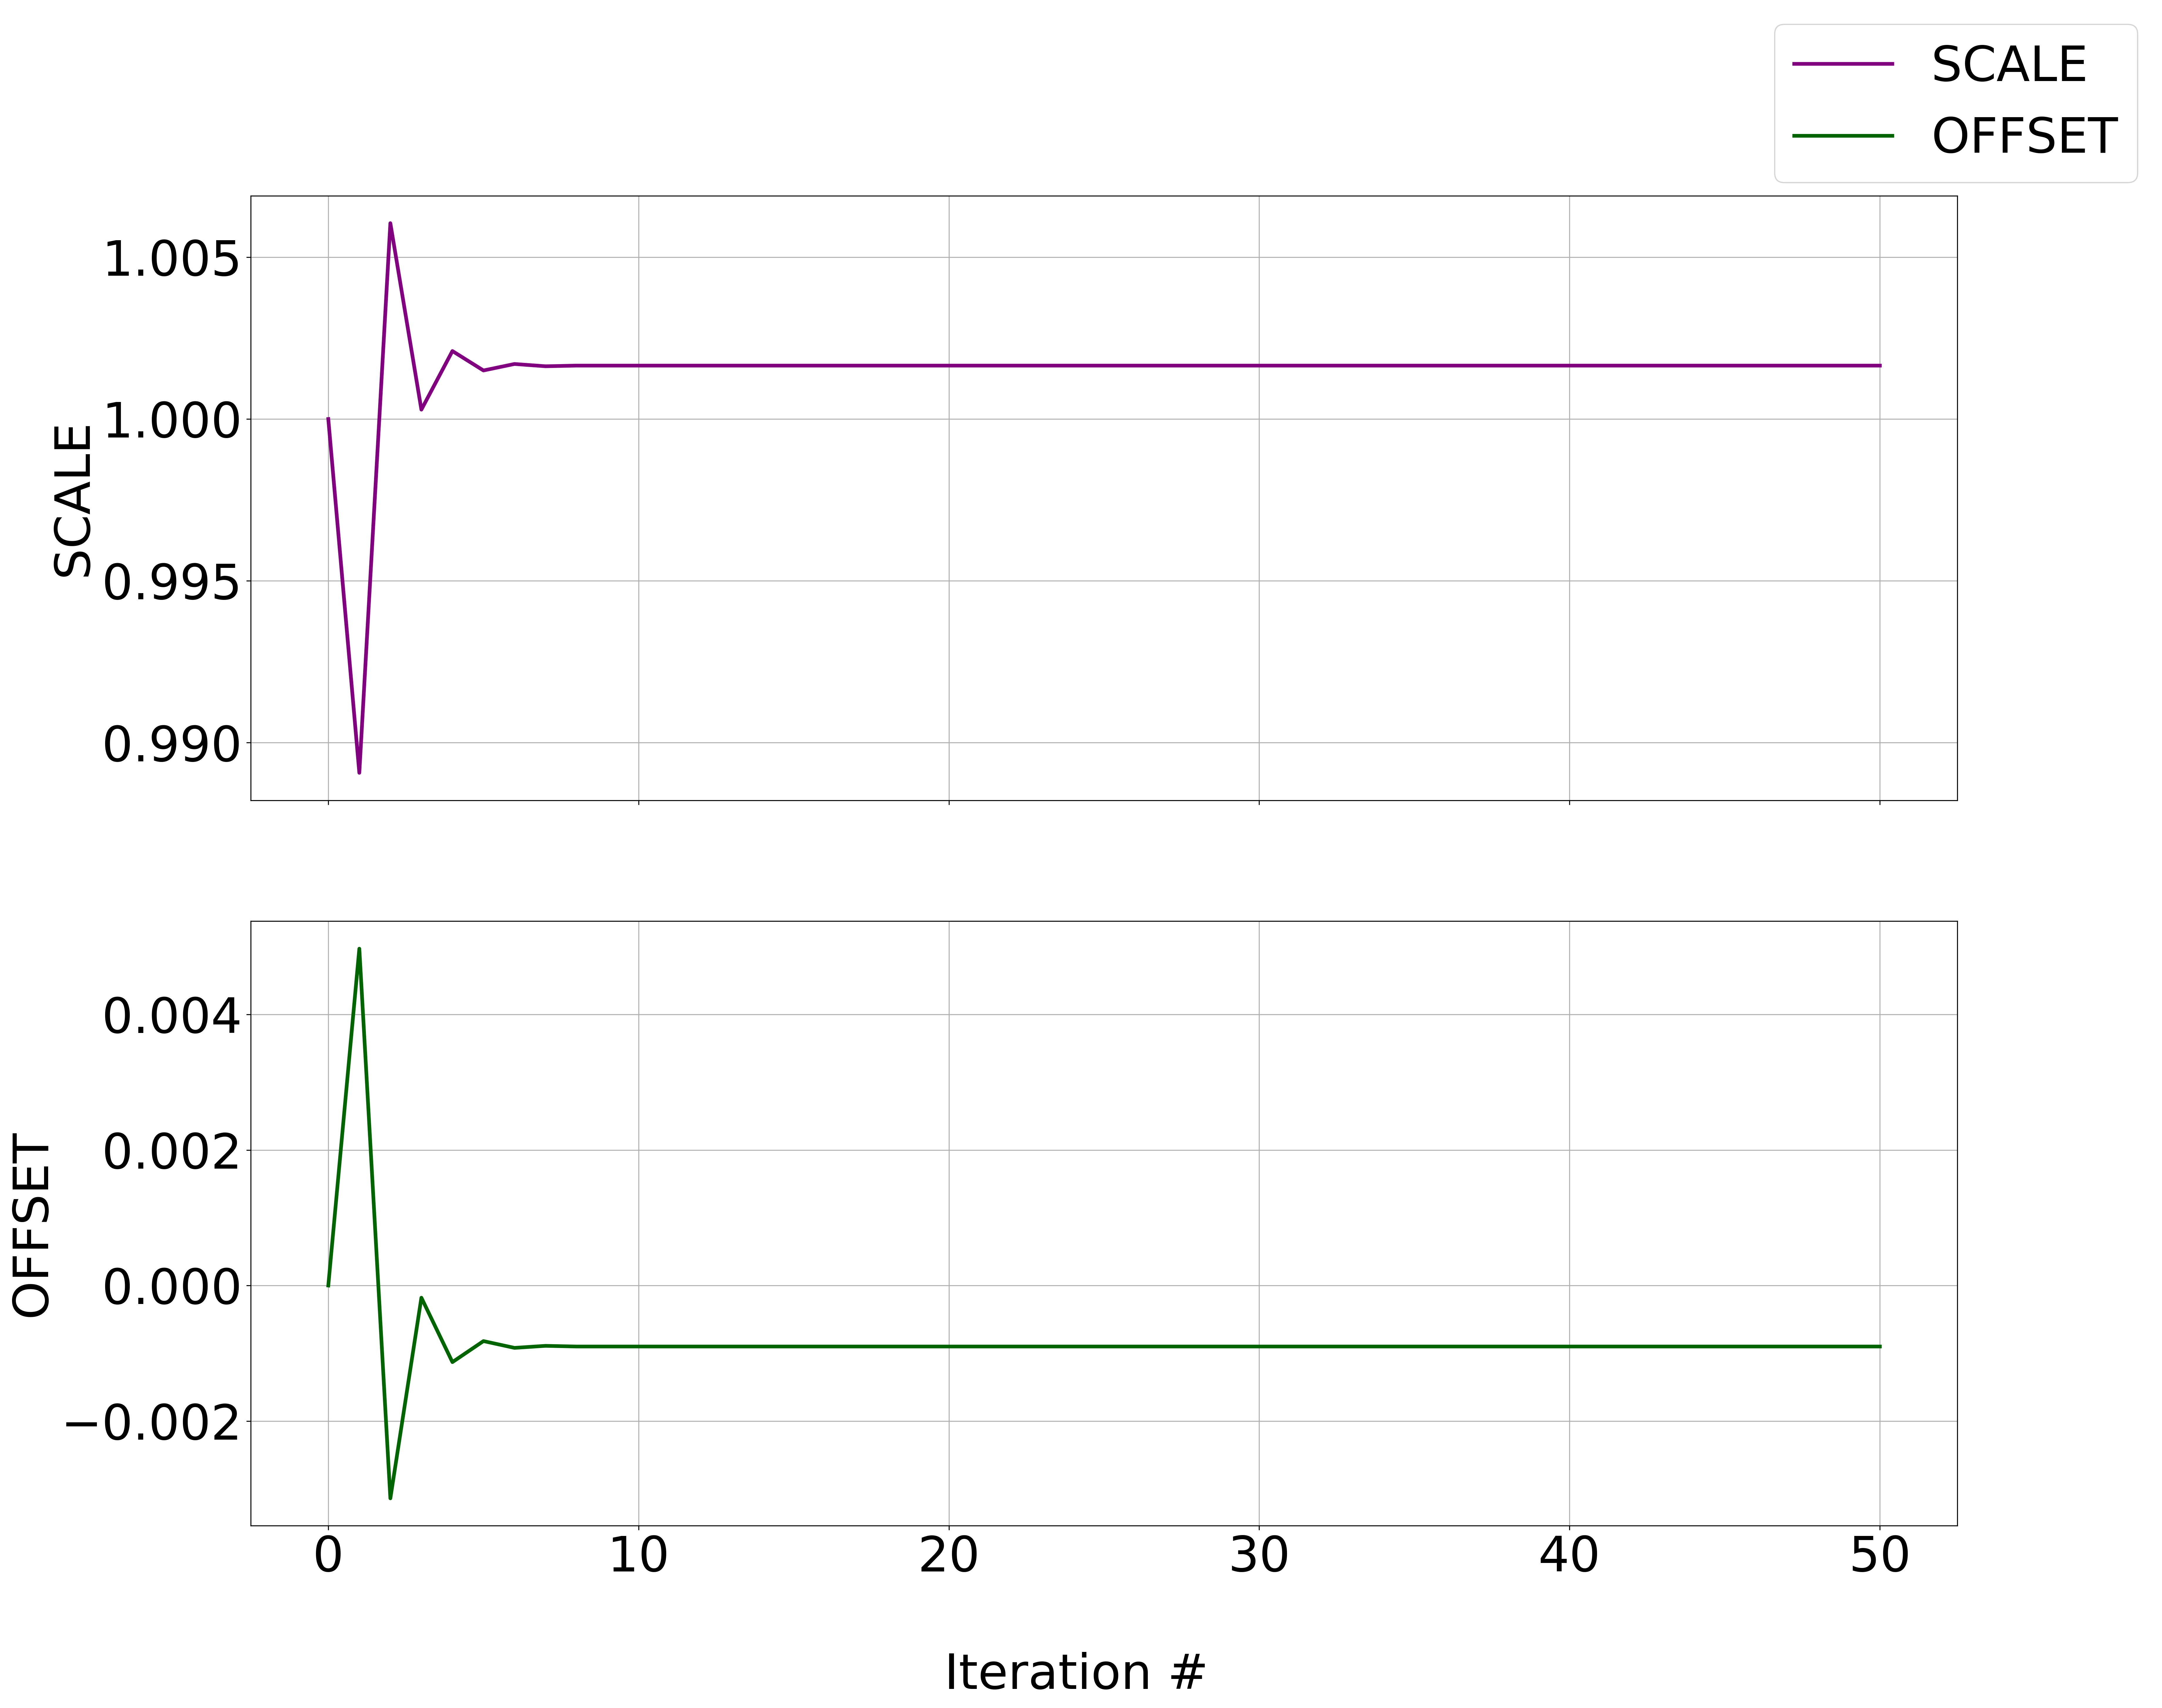

In [128]:
#Plotting Scale factor and offset for each iteration step
fig, (ax1, ax2) = plt.subplots(2, sharex='col', sharey='row', figsize=(25, 20), dpi=300)
ax1.plot(range(len(a_b)),a_b[...,1],'purple',linewidth=3)
ax2.plot(range(len(a_b)),a_b[...,2],'darkgreen',linewidth=3)
fig.legend(('SCALE', 'OFFSET'))
fig.text(0.5, 0.04, 'Iteration #', va='center', ha='center')
ax1.grid()
ax1.set(ylabel='SCALE')
ax2.grid()
ax2.set(ylabel='OFFSET')
plt.show()

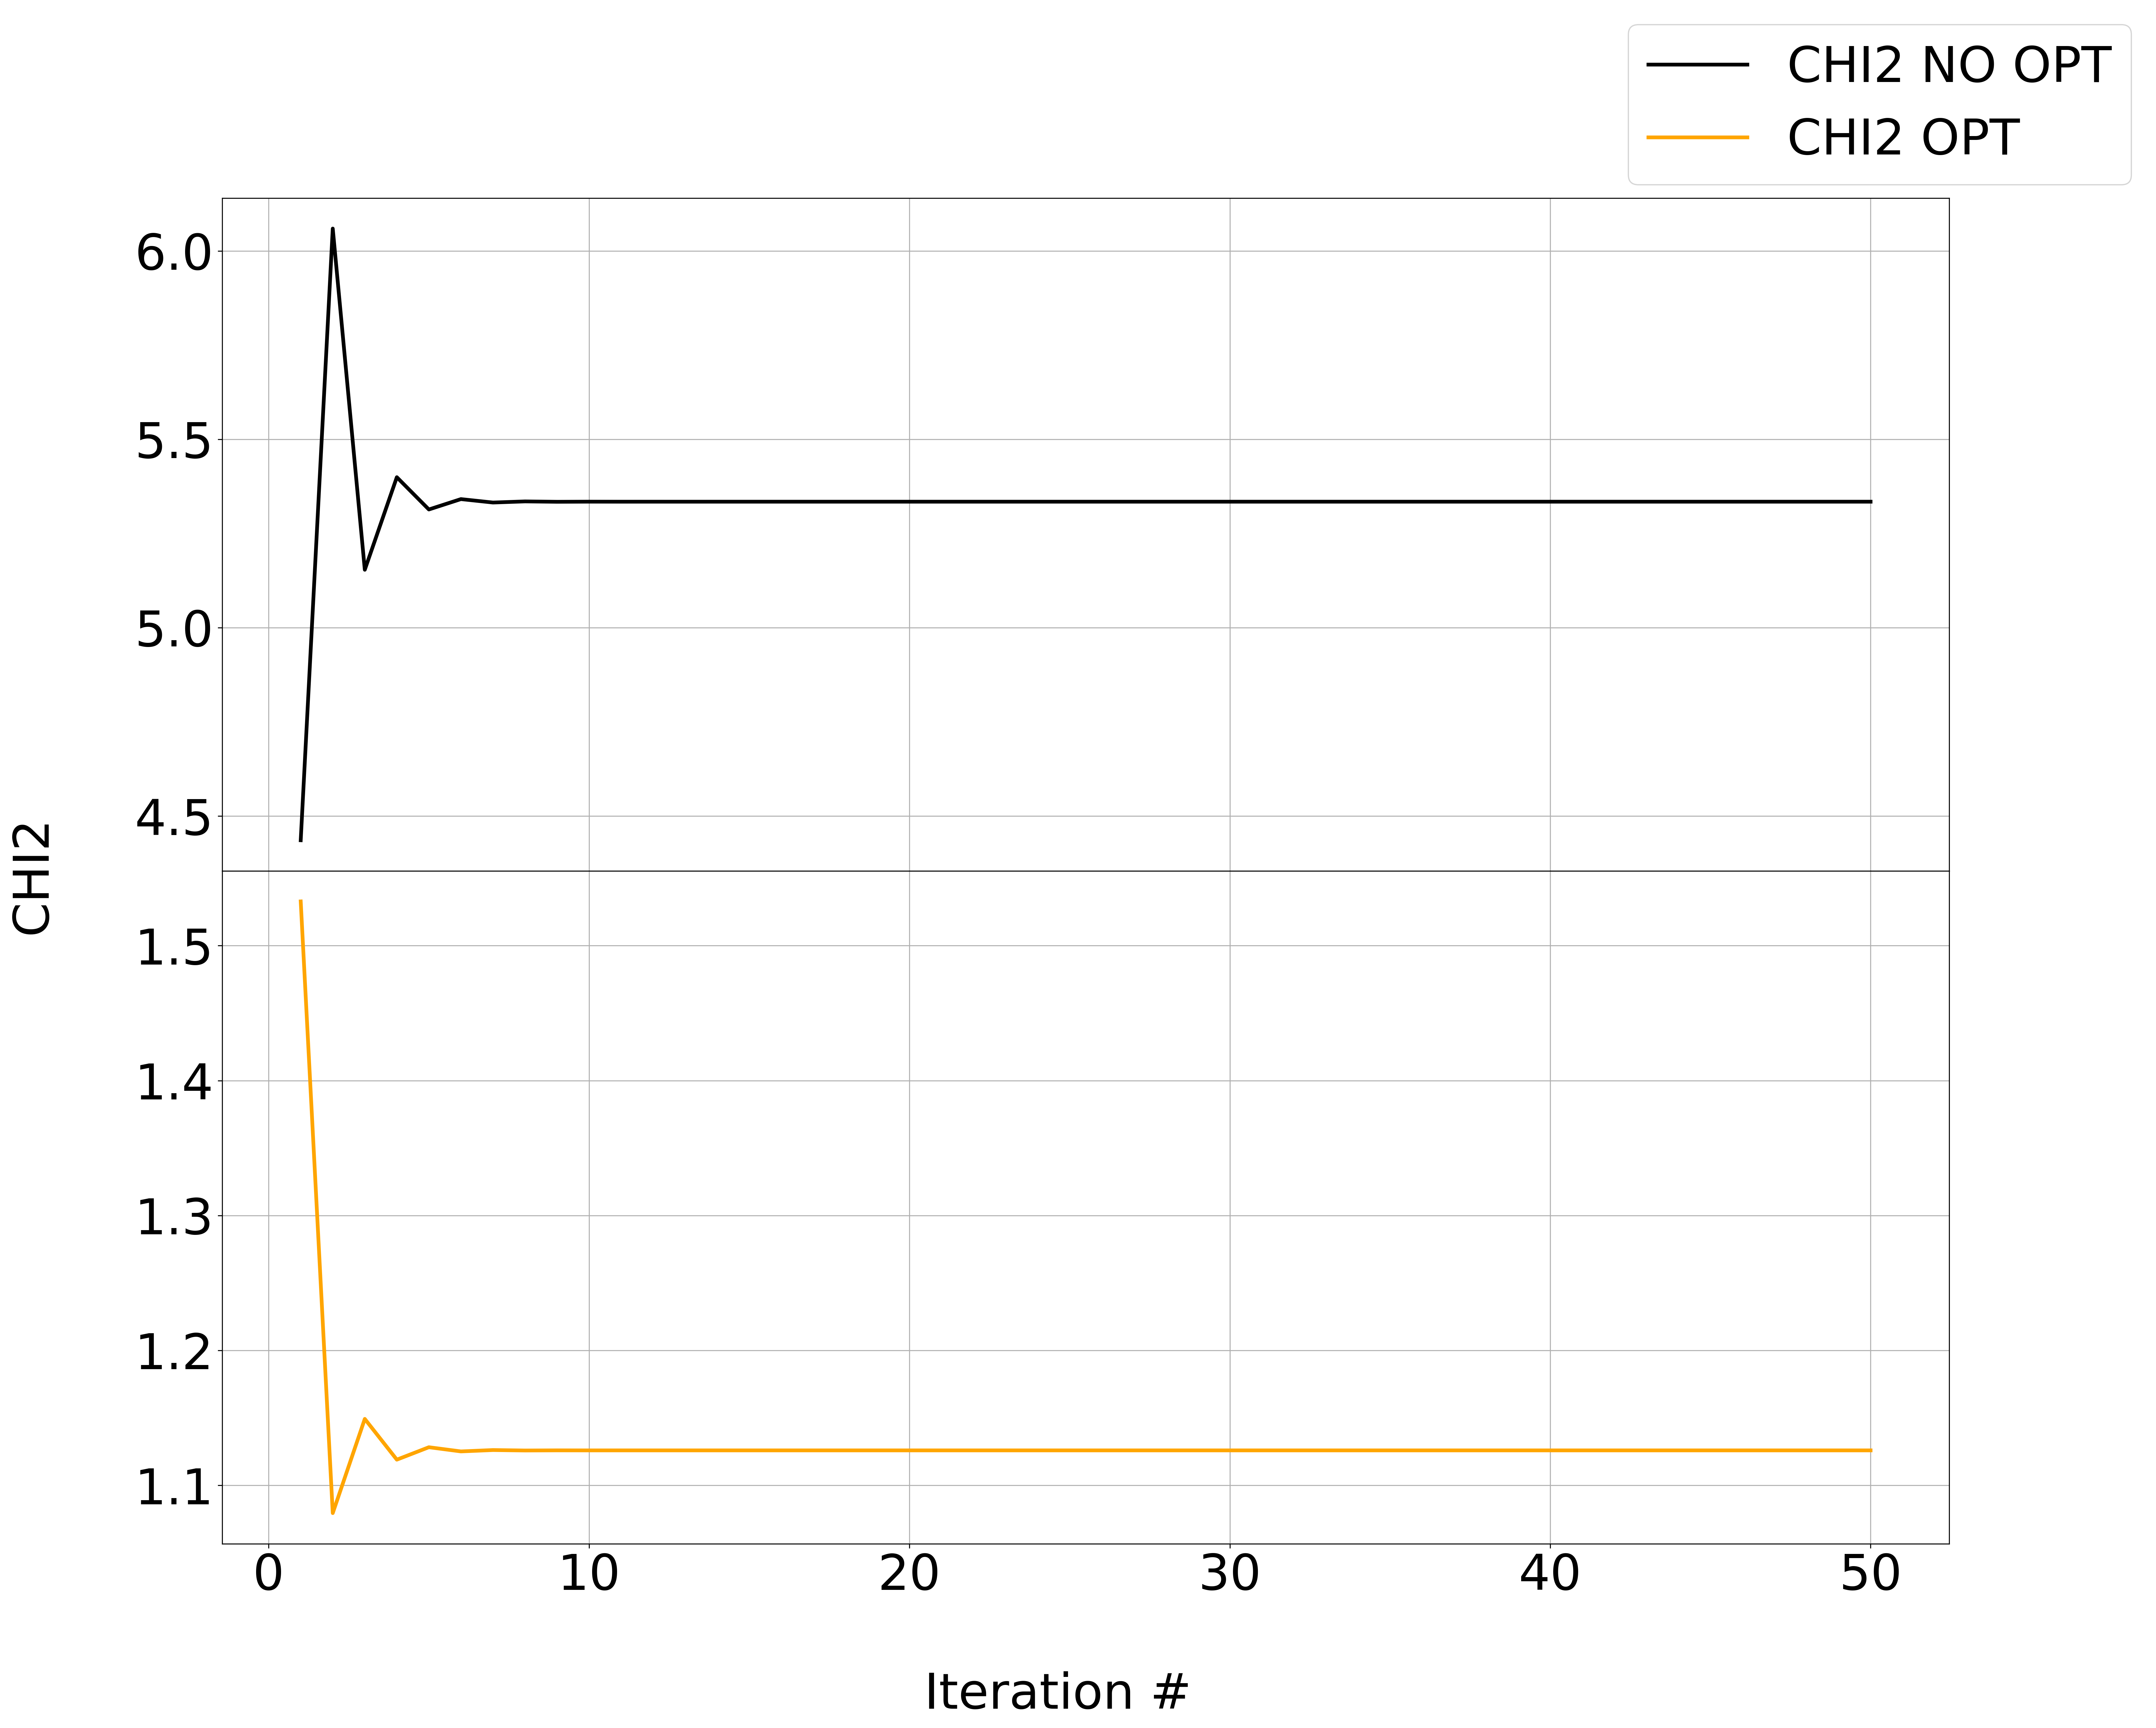

In [129]:
#Plotting initial chi2(CHI2 NO OPT) and BME-optimized chi2(chi2 OPT) - from BME output
fig, (ax1, ax2) = plt.subplots(2, sharex='col', sharey='row', figsize=(25, 20), dpi=300, gridspec_kw={'hspace': 0})
ax1.plot(range(1,len(d)+1),d[...,1],'black',linewidth=3)
ax2.plot(range(1,len(d)+1),d[...,2],'orange',linewidth=3)
fig.legend(('CHI2 NO OPT', 'CHI2 OPT'))
fig.text(0.5, 0.04, 'Iteration #', va='center', ha='center')
fig.text(0.04, 0.5, 'CHI2', va='center', ha='center', rotation='vertical')
ax1.grid()
ax2.grid()
plt.show()

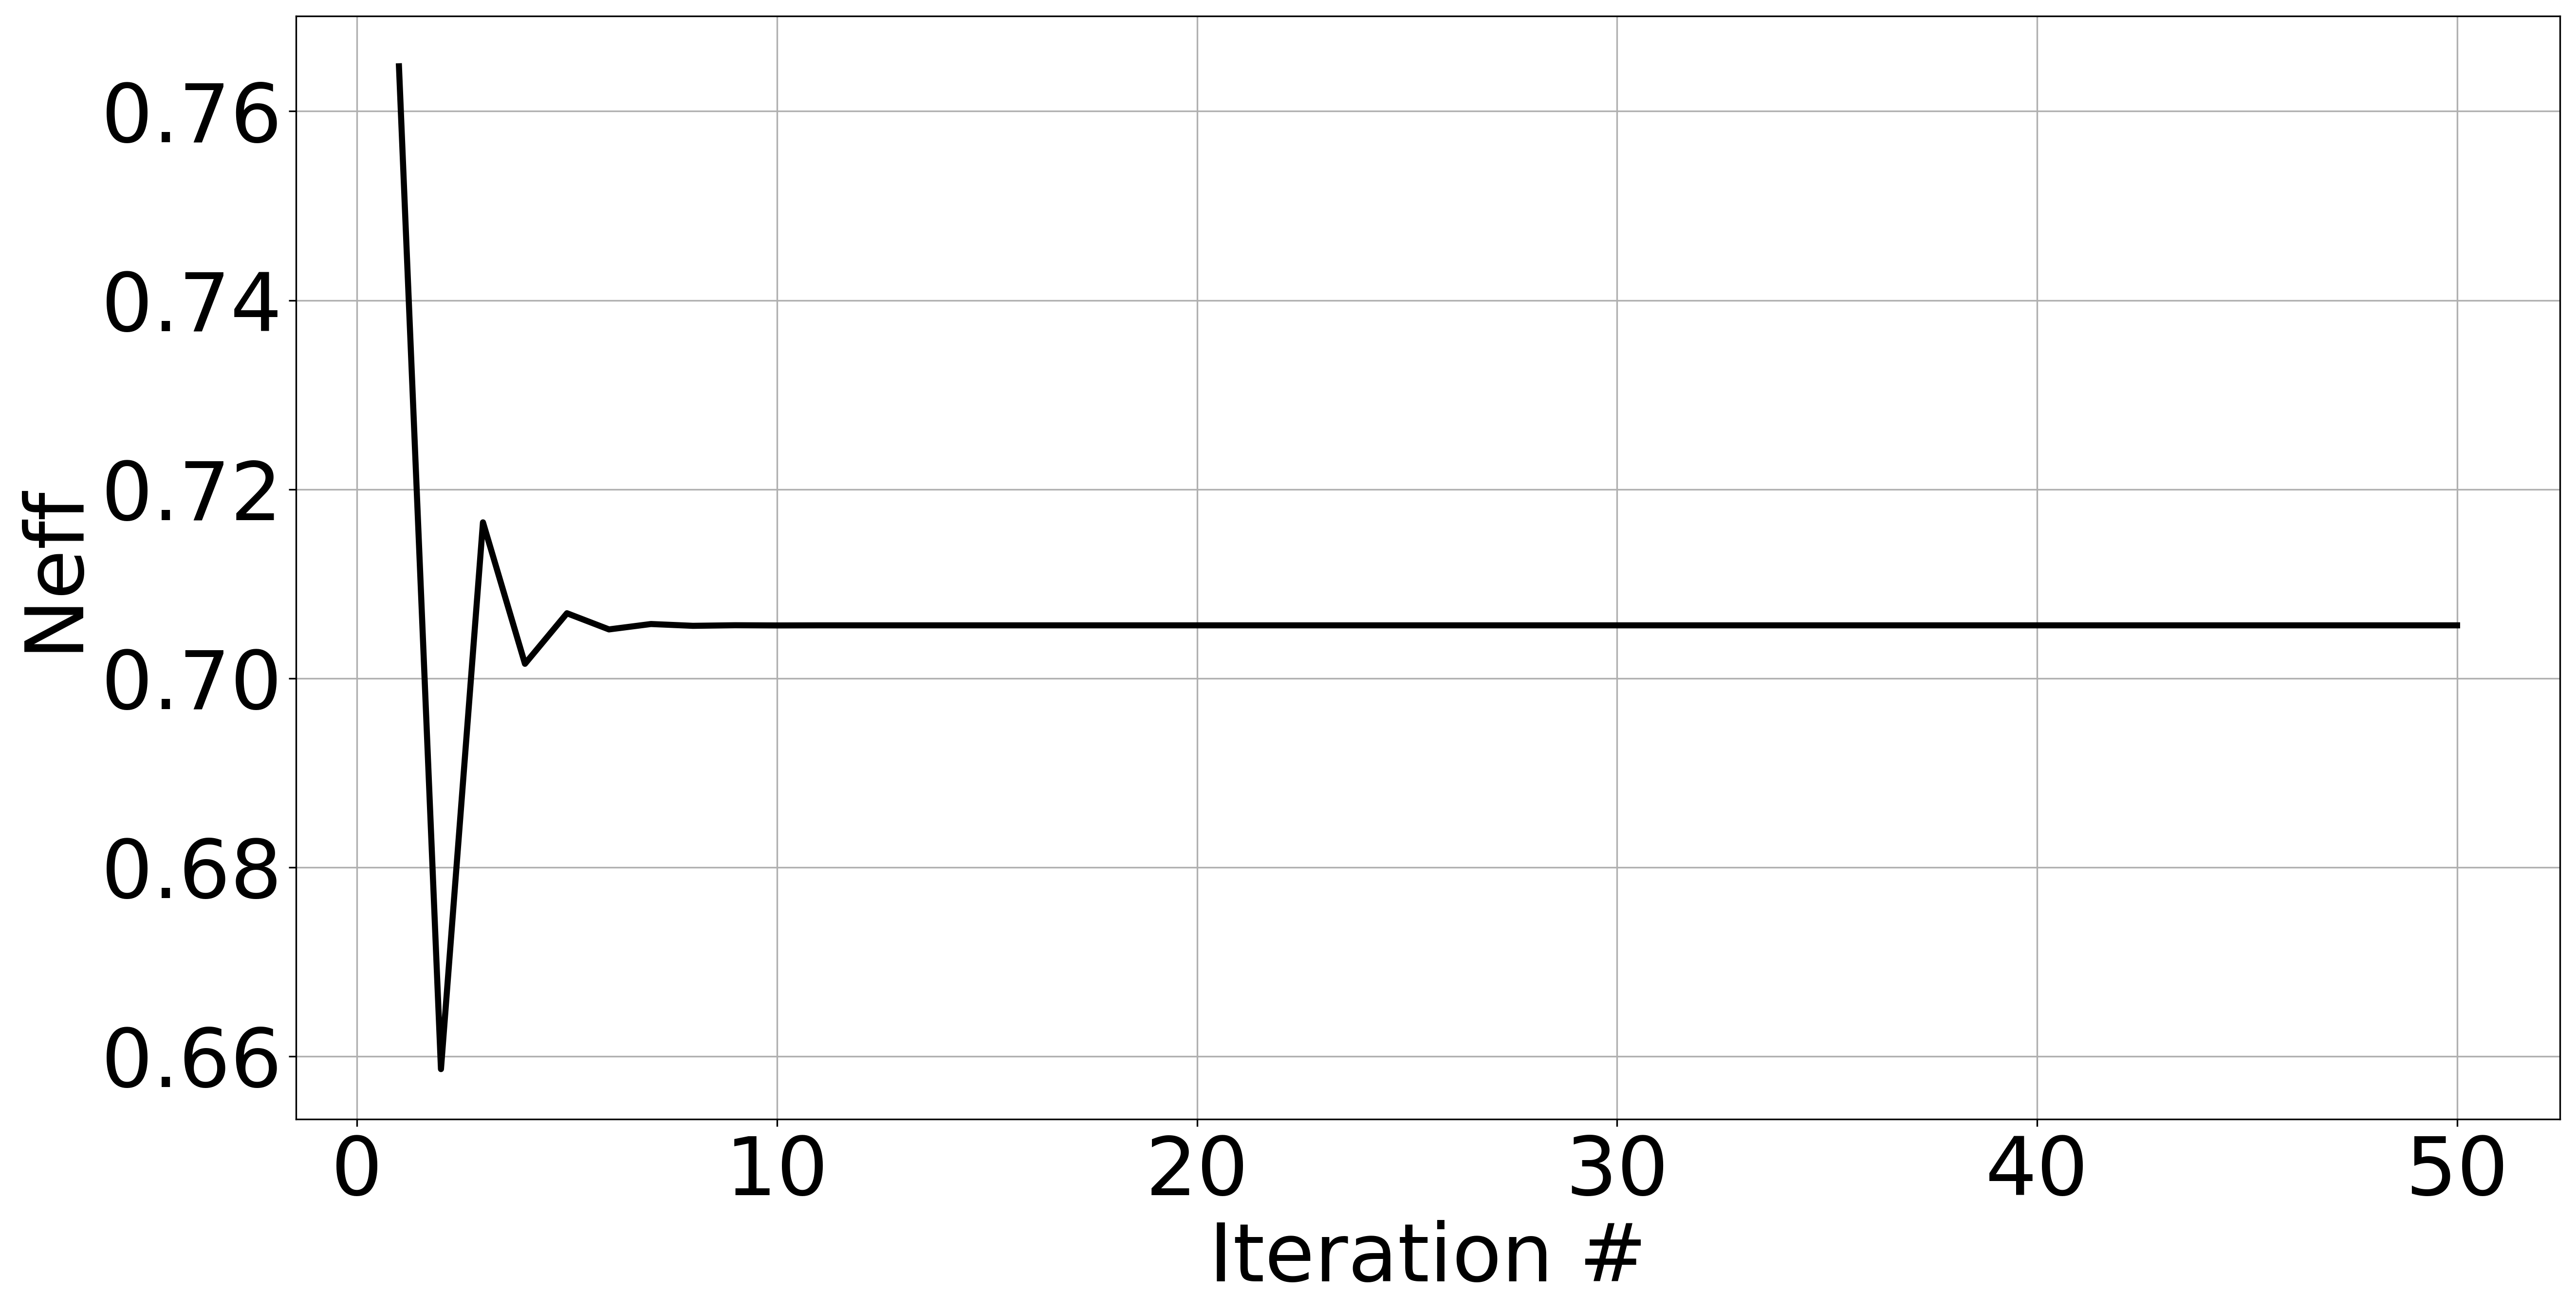

In [142]:
#Plotting N_eff - from BME output
plt.fig = plt.figure(figsize=(20, 10), dpi=300)
plt.plot(range(1,len(d)+1),d[...,3],'black',linewidth=3)
plt.xlabel('Iteration #')
plt.ylabel('Neff')
plt.grid(True)
plt.show()

## TRIAL 3 END
### With the new dataset the chi2-OPT value at convergence is better than with the old one (1.16). There is always the problem that lower values are explored before convergence, but in the end also Neff has the same behaviour so I think it's ok. Neff is definitely higher than before (0.52) at the same theta!

# -------------------------------------------------------------------------------------------

## TRIAL 4
### MInimizing chi2 instead of doing a linear regression to get optimal scale factor/offset. Not using fixed-point iteration method.

In [ ]:
#Initialize cycle counter (c) and empy lists to store at each cycle the results of BME (data) and the scale factor/offset (ab)
c = 0
data = []
ab = []

#First averaging of Pepsi-SAXS profiles with uniform weights
Iav = np.mean(calc,axis=0)

#Function to minimize. It calculates the chi2 with the averaged Pepsi-SAXS profiles modified with scale factor and offset
def chireg(param, ens):
    a, b = param
    mod = a*ens+b
    chi = ((((mod-exp)/err)**2).sum())/len(exp)
    return(chi)

In [ ]:
while c < 50: #Doing 50 cycles
    
    #Function chireg is minimized (scipy) 
    init = [1,0] #Starting values for scale factor and offset
    result = optimize.minimize(chireg, init, args=Iav, method='CG', tol=0.00001 ,options={'disp': True}) #Minimization
    alpha = result.x[0]
    beta = result.x[1]
    ab.append(np.array([c,alpha,beta]))

    #Applying scale factor and offset obtained in this cycle to the Pepsi-SAXS ensemble and write to file to feed BME
    new_calc_raw = alpha*calc+beta
    new_calc = open('tmp', 'w')
    new_calc.write('#\n')
    for i in range(0,np.shape(new_calc_raw)[0]):
        new_calc.write('frame'+str(i)+' '+' '.join(str(n) for n in new_calc_raw[i])+'\n')
    new_calc.close()

    #Running BME with the scaled/shifted ensemble
    rew = bme.Reweight()
    rew.load('exp_saxs.txt', 'tmp')
    chi2_before, chi2_after, srel = rew.optimize(theta=t)
    data.append(np.array([c, chi2_before, chi2_after, np.exp(srel)]))
    weights = rew.get_weights()

    #Weighted average of the Pepsi-SAXS profiles with BME weights 
    calc_rew = []
    for i in range(0,np.shape(new_calc_raw)[1]):
        calc_rew.append((new_calc_raw[...,i]*weights).sum())
    Iav = np.array(calc_rew)

    c += 1

In [ ]:
#Saving results to file
np.savetxt('data_trial4', data, fmt='%10.5f', delimiter=' ', newline='\n')
np.savetxt('ab_trial4', ab, fmt='%10.5f', delimiter=' ', newline='\n')

In [143]:
#Reloading the results for analysis
d = np.loadtxt('data_trial4')
a_b = np.loadtxt('ab_trial4')
print(d[-1])

[49.       5.29596  1.13016  0.70747]


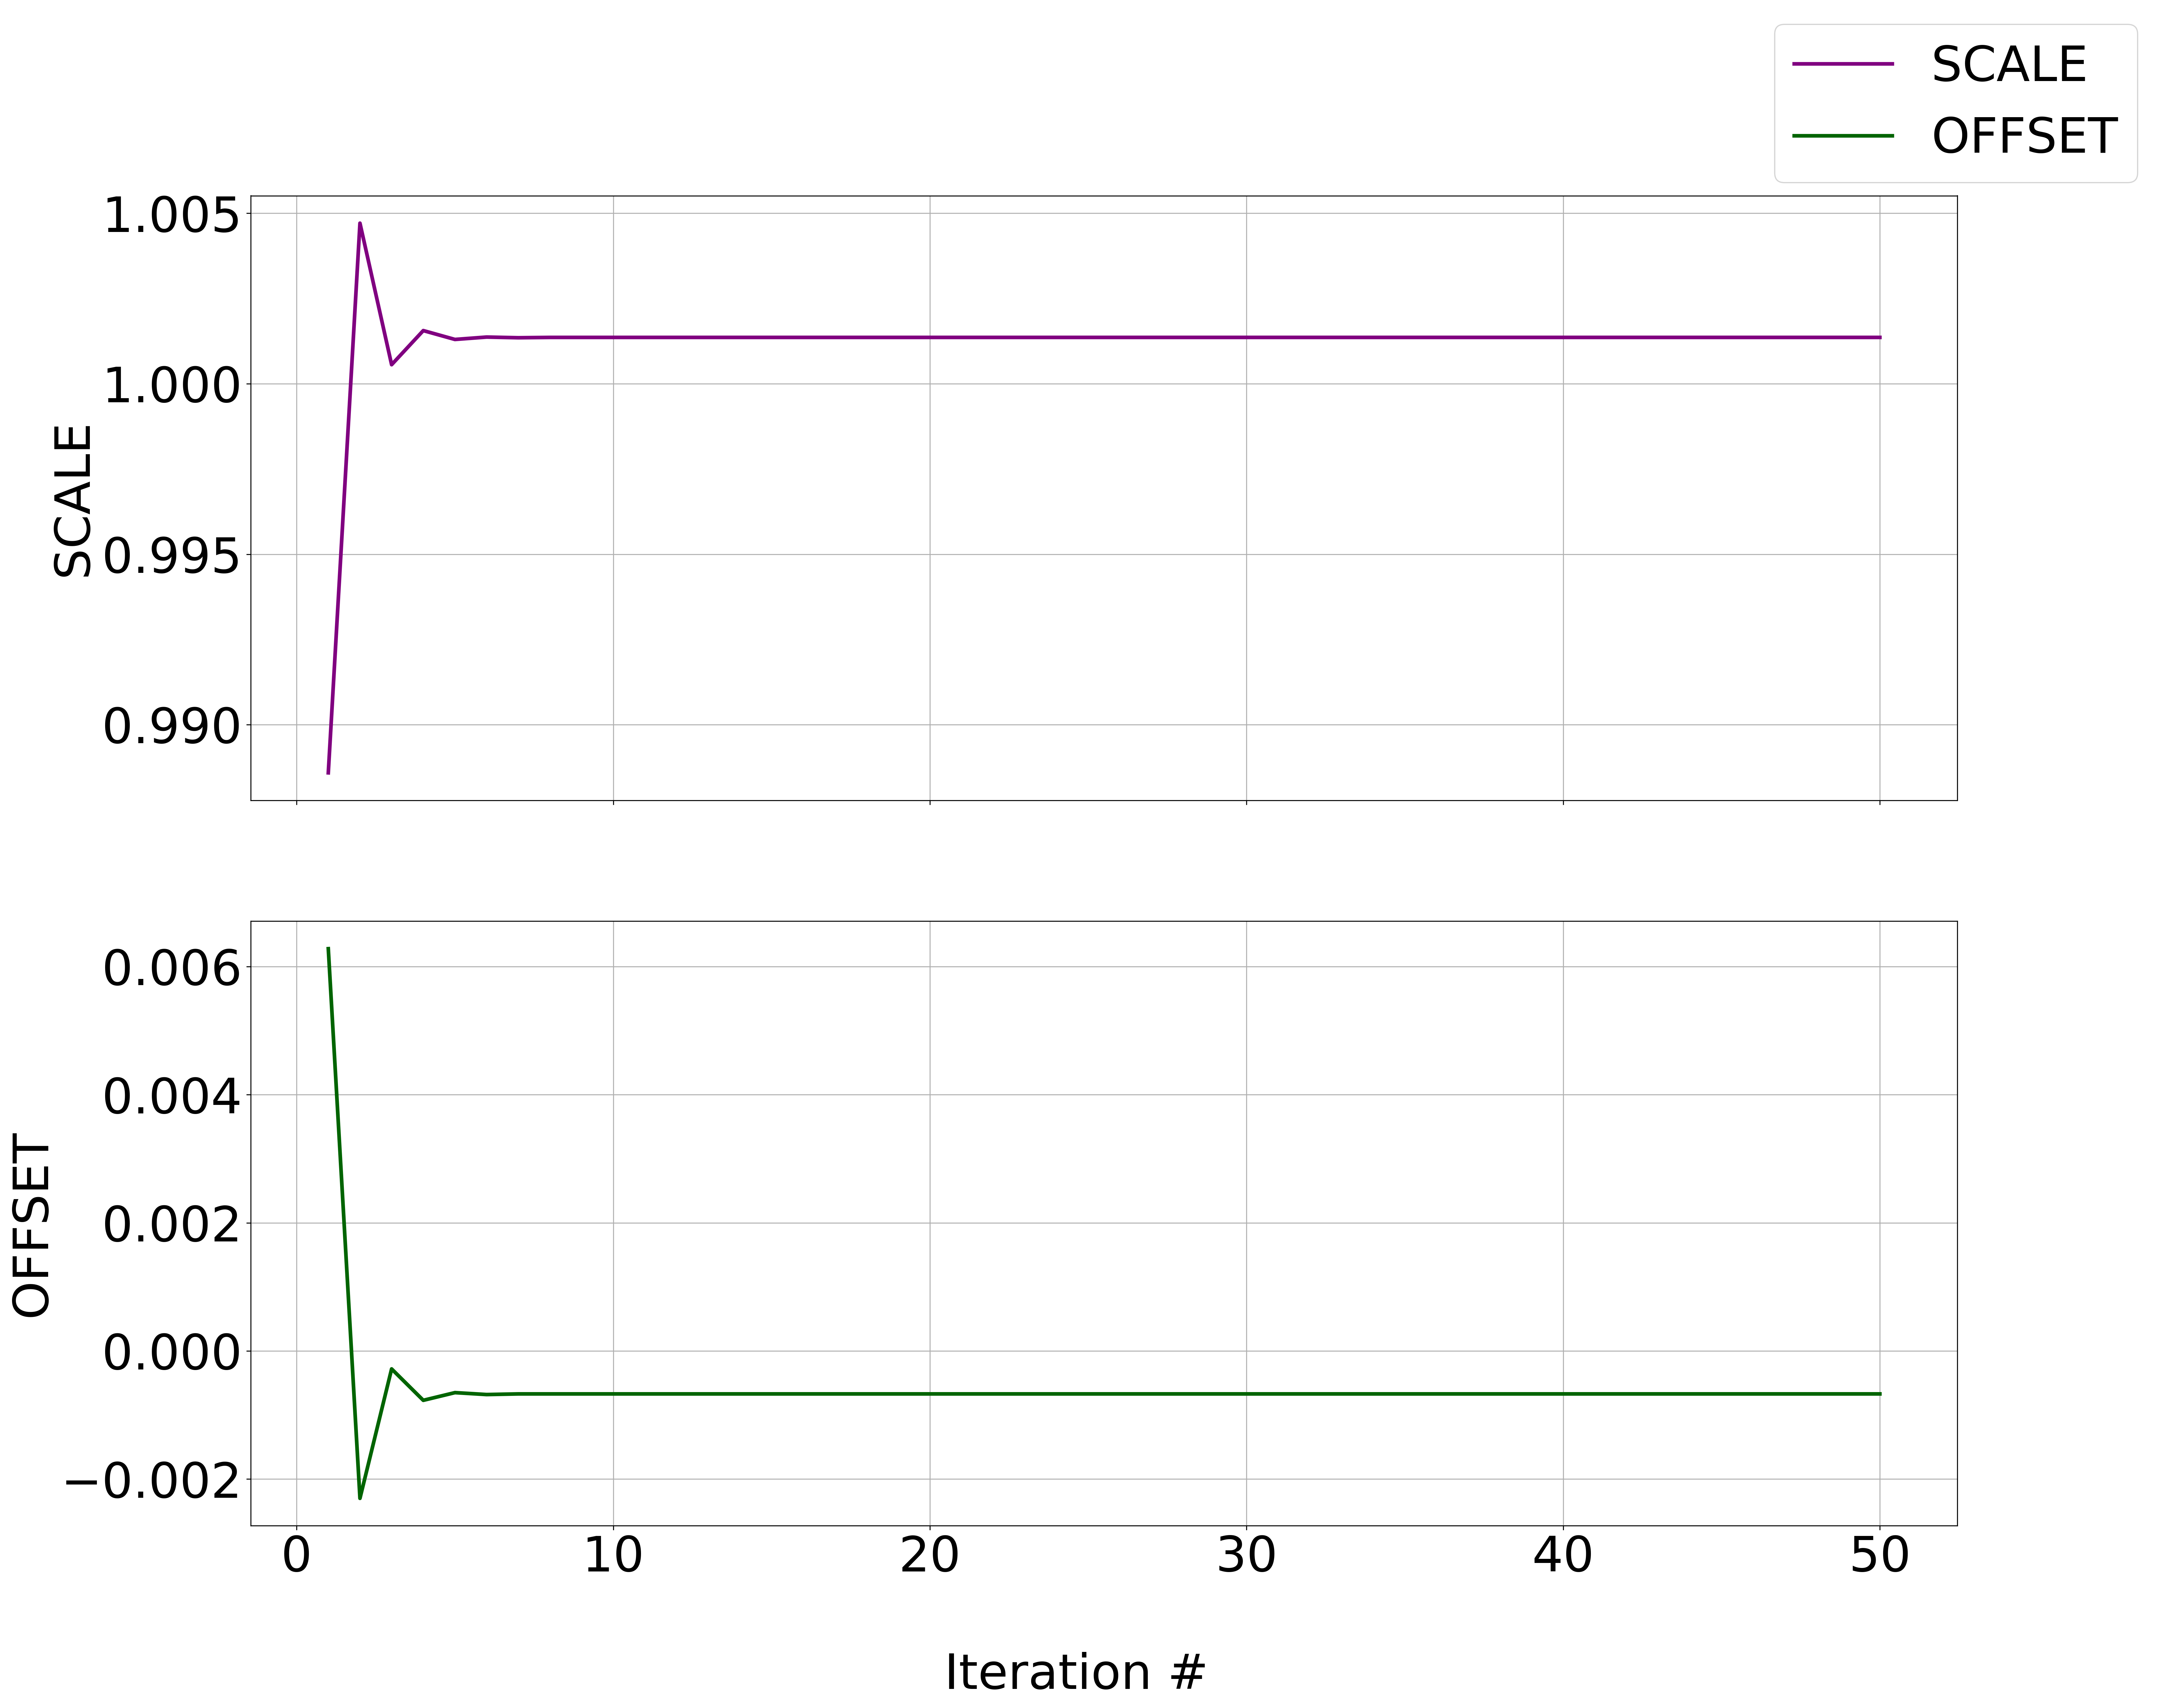

In [132]:
#Plotting Scale factor and offset for each iteration step
fig, (ax1, ax2) = plt.subplots(2, sharex='col', sharey='row', figsize=(25, 20), dpi=300)
ax1.plot(range(1,len(a_b)+1),a_b[...,1],'purple',linewidth=3)
ax2.plot(range(1,len(a_b)+1),a_b[...,2],'darkgreen',linewidth=3)
fig.legend(('SCALE', 'OFFSET'))
fig.text(0.5, 0.04, 'Iteration #', va='center', ha='center')
ax1.grid()
ax1.set(ylabel='SCALE')
ax2.grid()
ax2.set(ylabel='OFFSET')
plt.show()

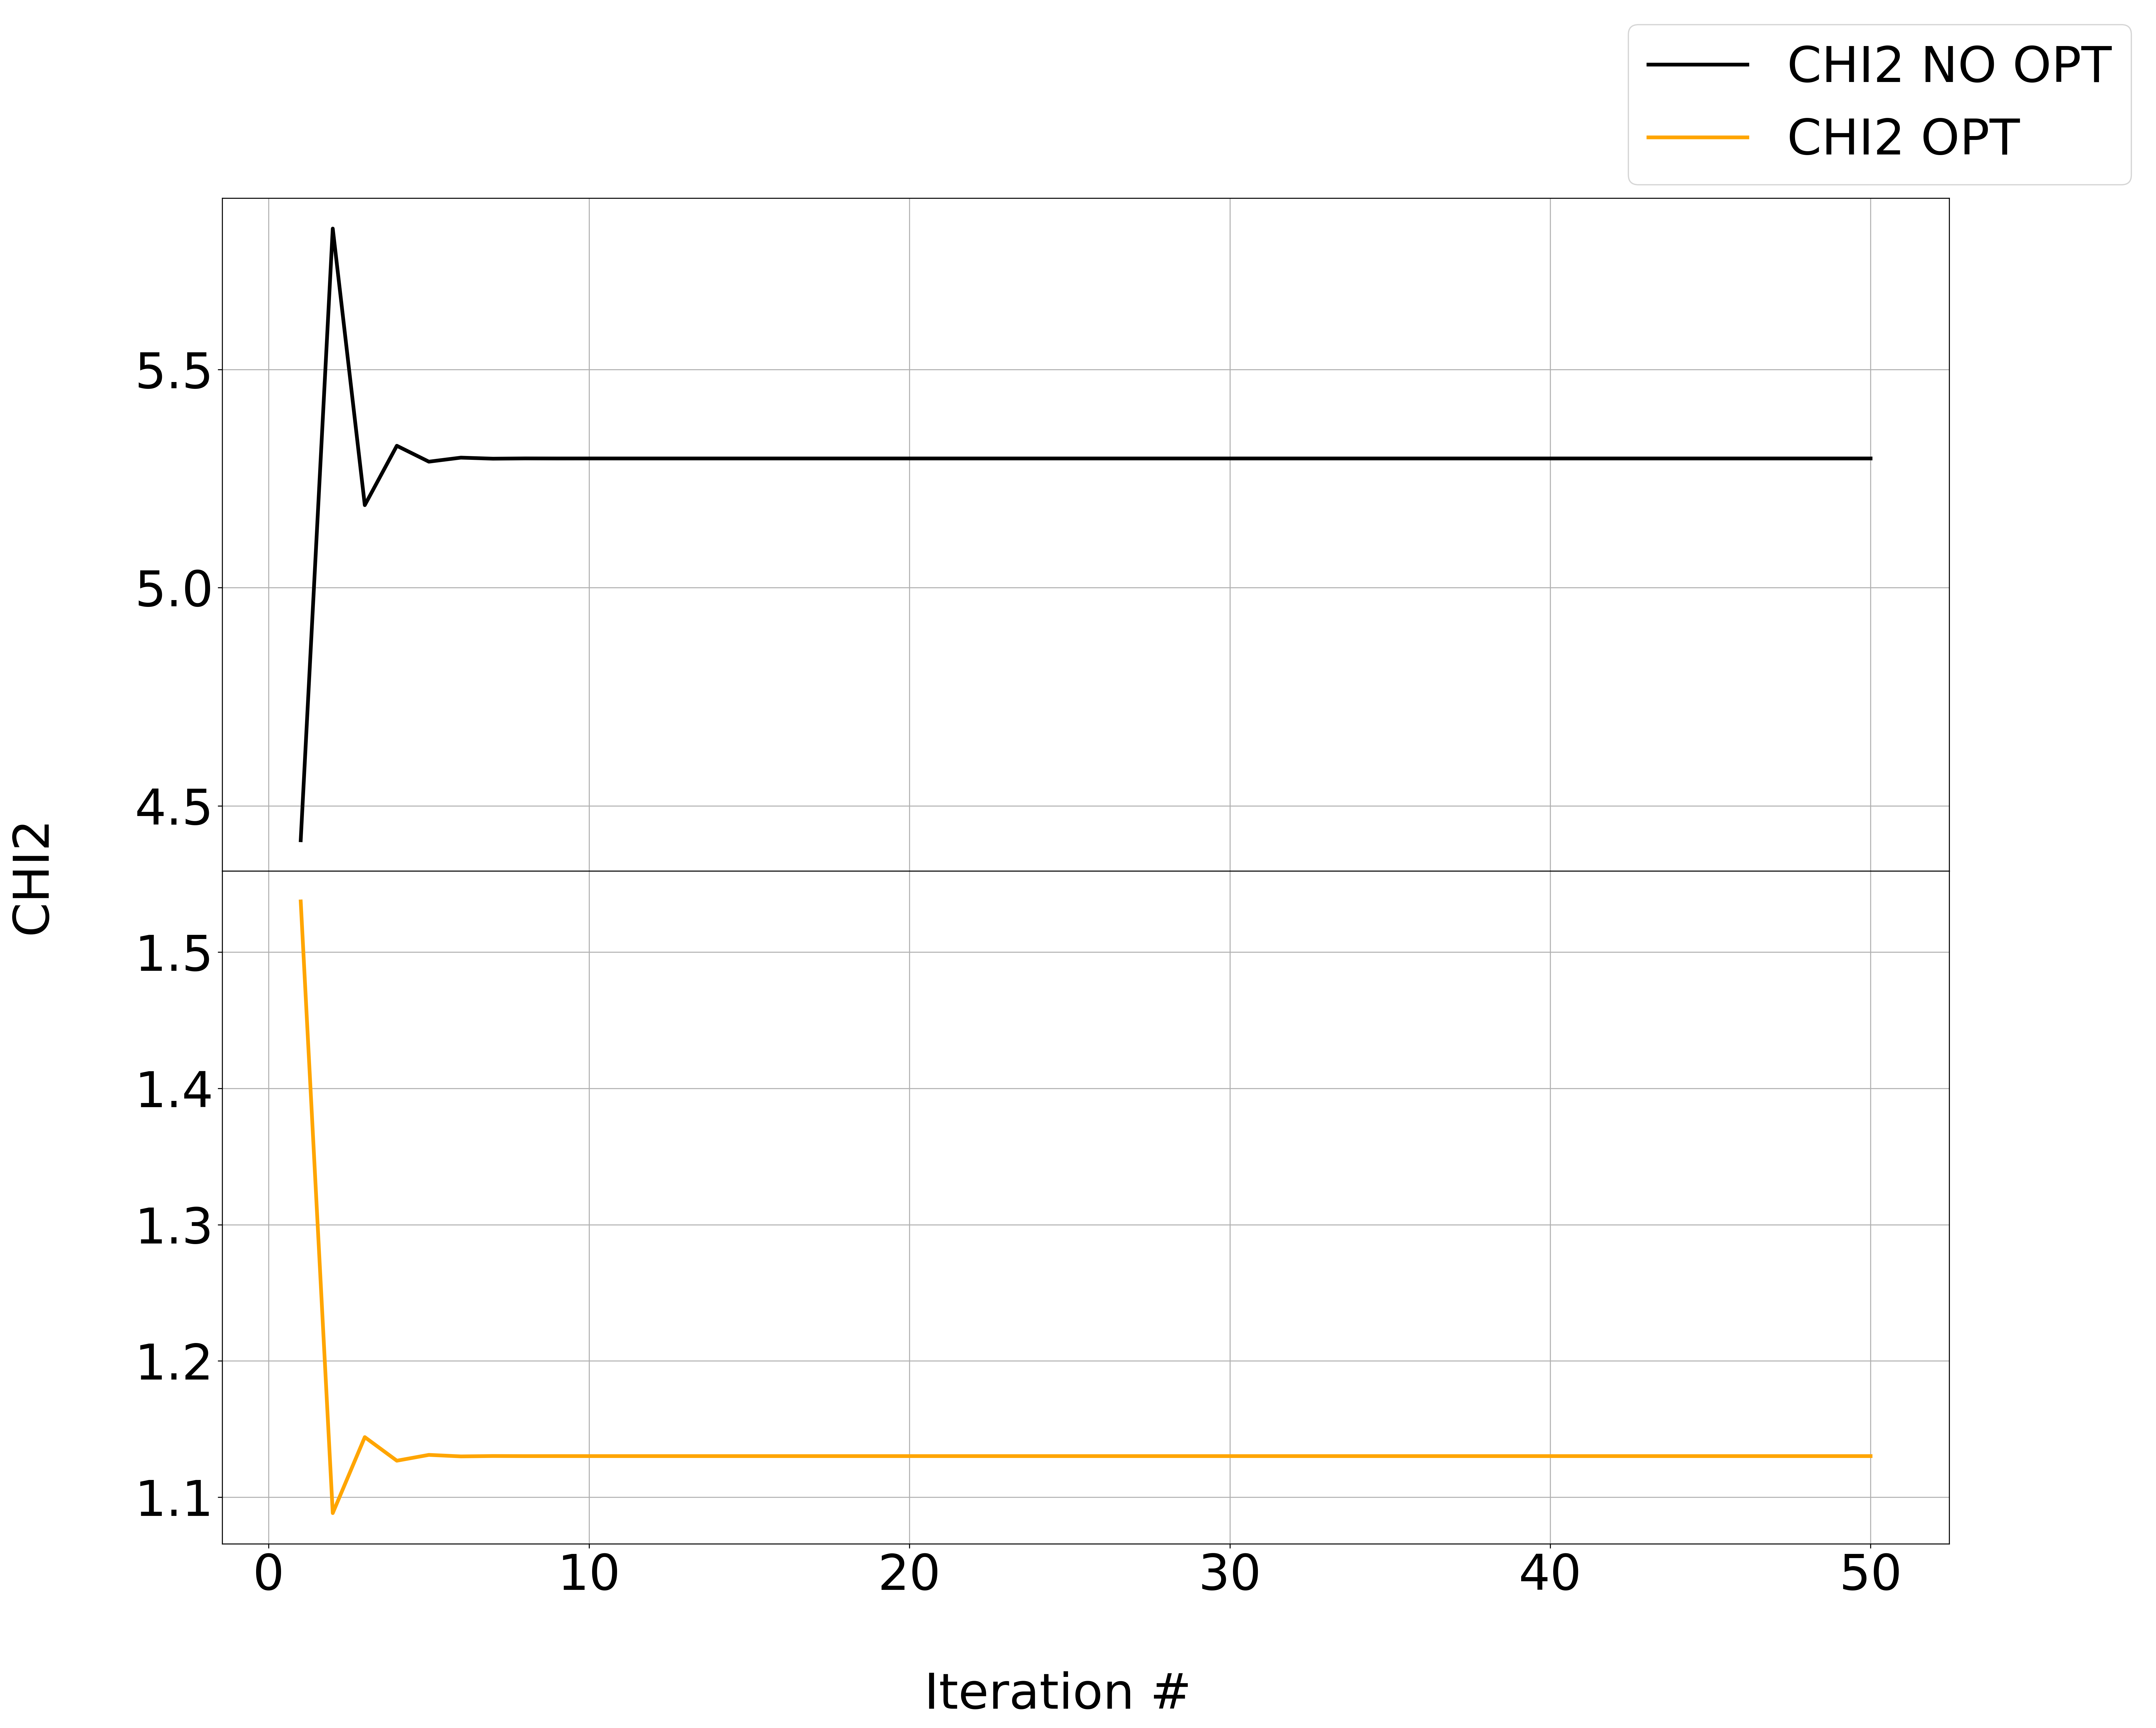

In [133]:
#Plotting initial chi2(CHI2 NO OPT) and BME-optimized chi2(chi2 OPT) - from BME output
fig, (ax1, ax2) = plt.subplots(2, sharex='col', sharey='row', figsize=(25, 20), dpi=300, gridspec_kw={'hspace': 0})
ax1.plot(range(1,len(d)+1),d[...,1],'black',linewidth=3)
ax2.plot(range(1,len(d)+1),d[...,2],'orange',linewidth=3)
fig.legend(('CHI2 NO OPT', 'CHI2 OPT'))
fig.text(0.5, 0.04, 'Iteration #', va='center', ha='center')
fig.text(0.04, 0.5, 'CHI2', va='center', ha='center', rotation='vertical')
ax1.grid()
ax2.grid()
plt.show()

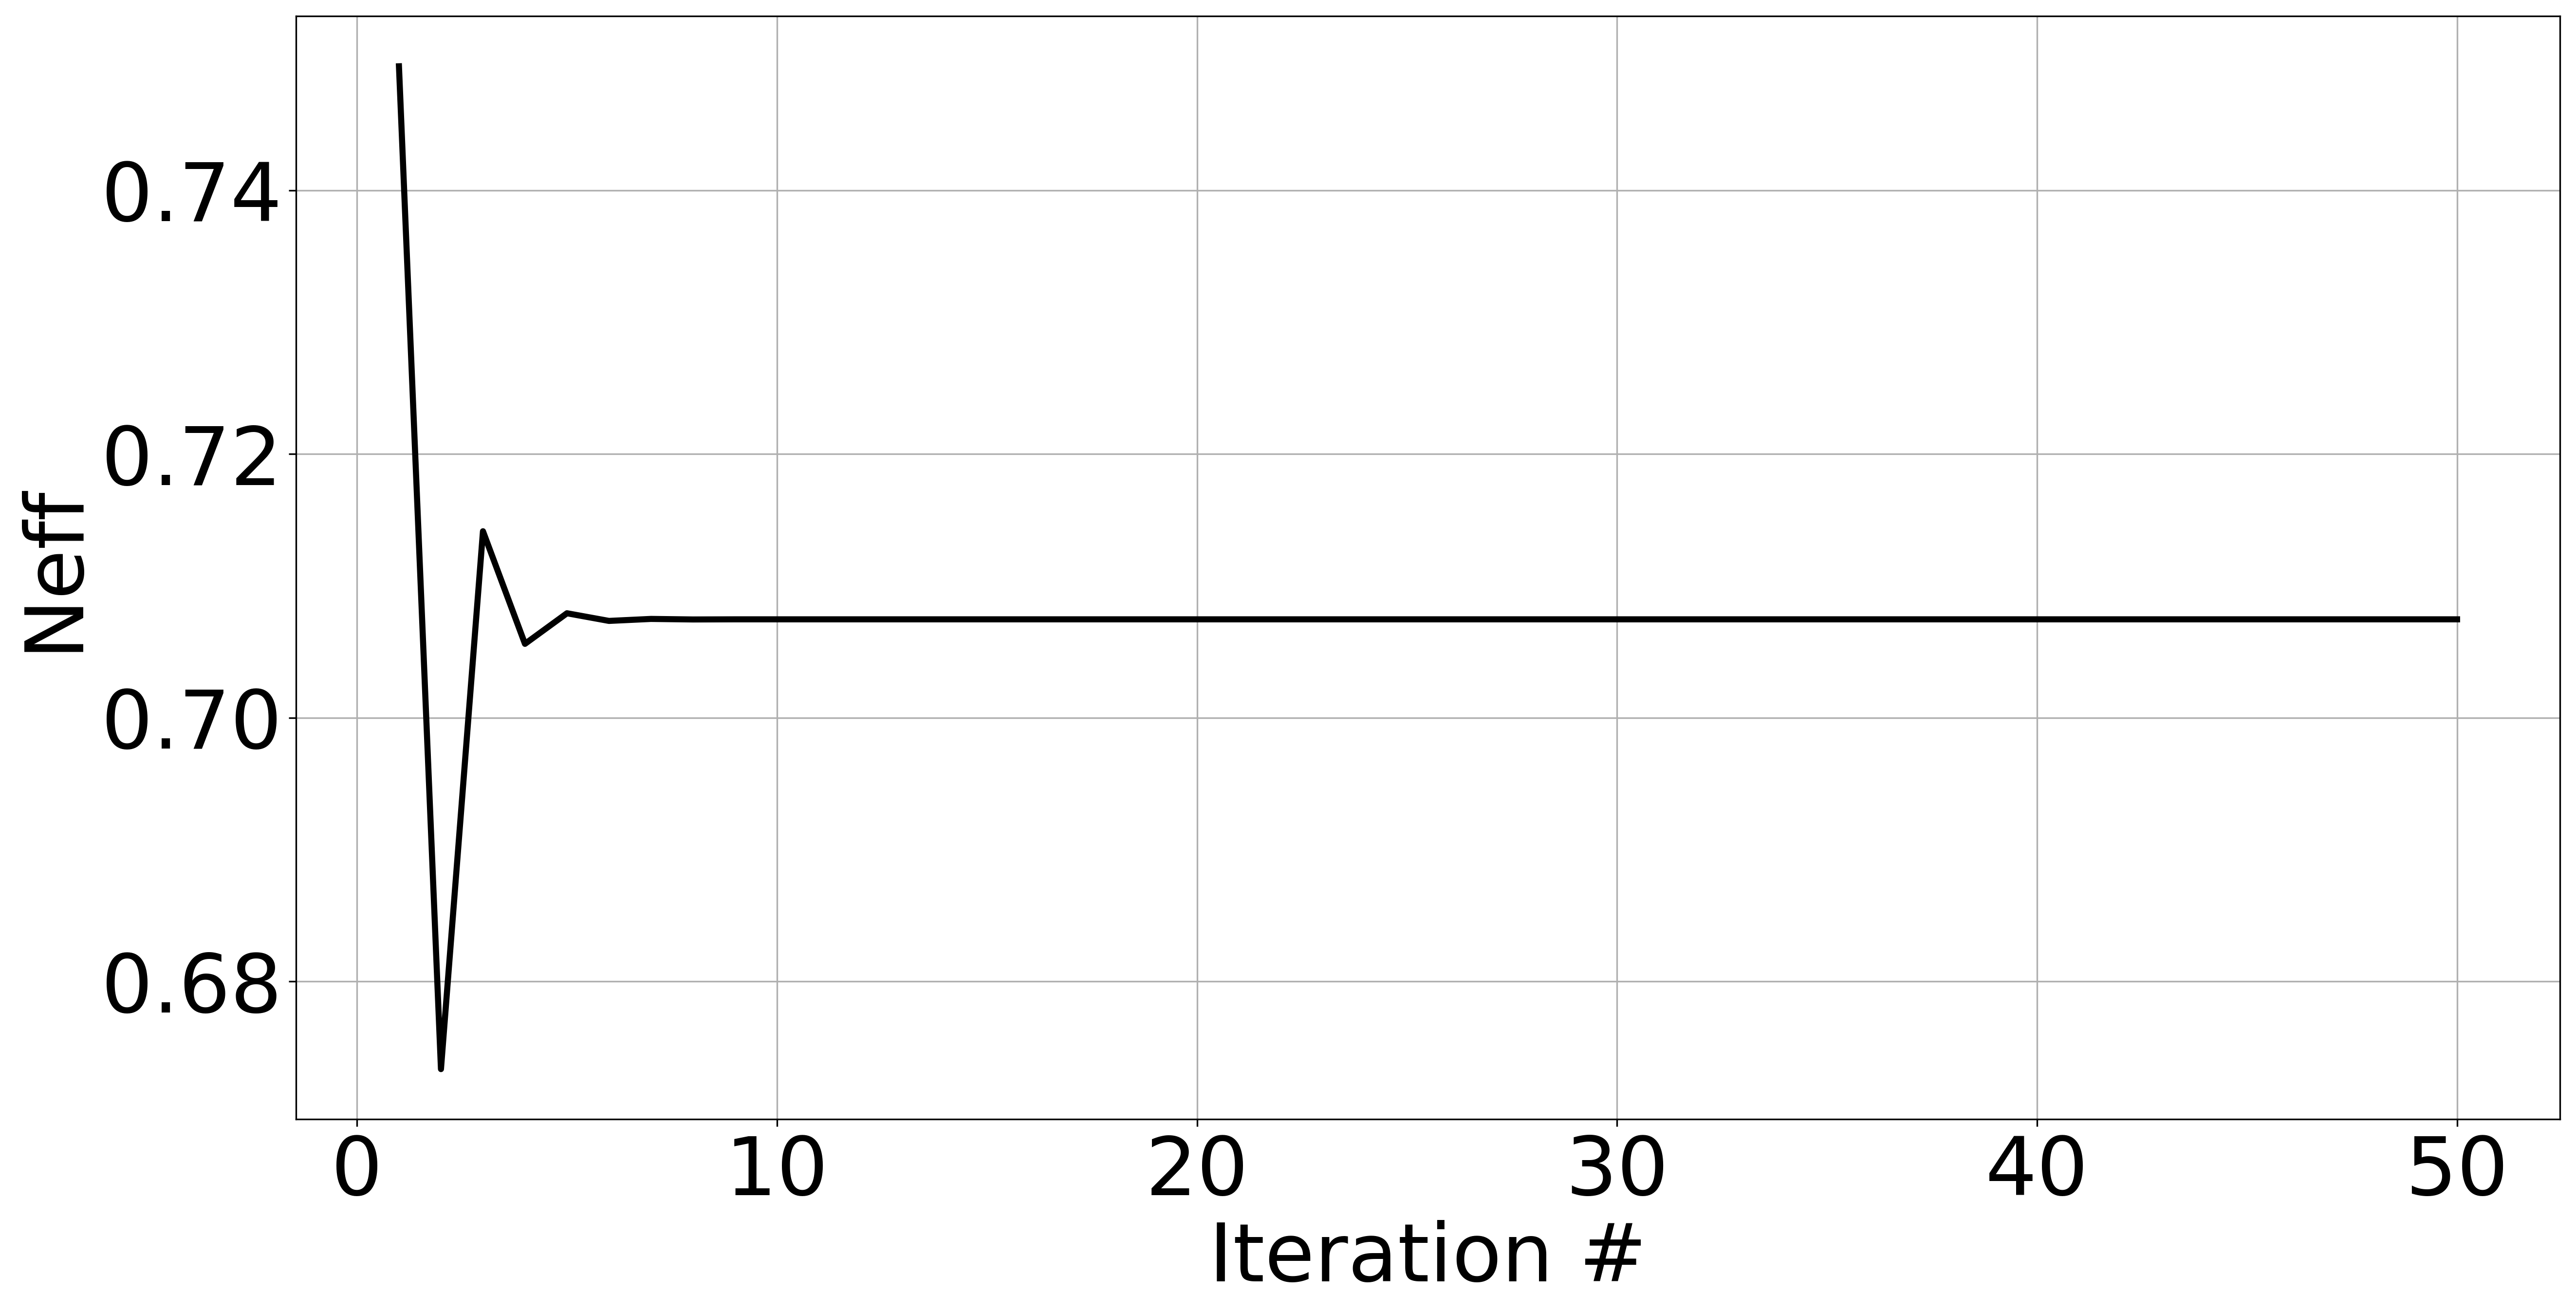

In [134]:
#Plotting N_eff - from BME output
plt.fig = plt.figure(figsize=(20, 10), dpi=300)
plt.plot(range(1,len(d)+1),d[...,3],'black',linewidth=3)
plt.xlabel('Iteration #')
plt.ylabel('Neff')
plt.grid(True)
plt.show()

## TRIAL 4 END
### Almost equal results compared to TRIAL 3. chi2-OPT value is slightly higher, so I'd prefer to use weighted linear regression. 

# In the end this seems better than with the previous dataset. No fixed-point iteration method is needed and convergence can be reached in few iterations. 